In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_data = pd.read_csv('SalesData.csv')

In [3]:
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


#### 1. Compare Sales by Region for 2016 with 2015 using a Bar Chart

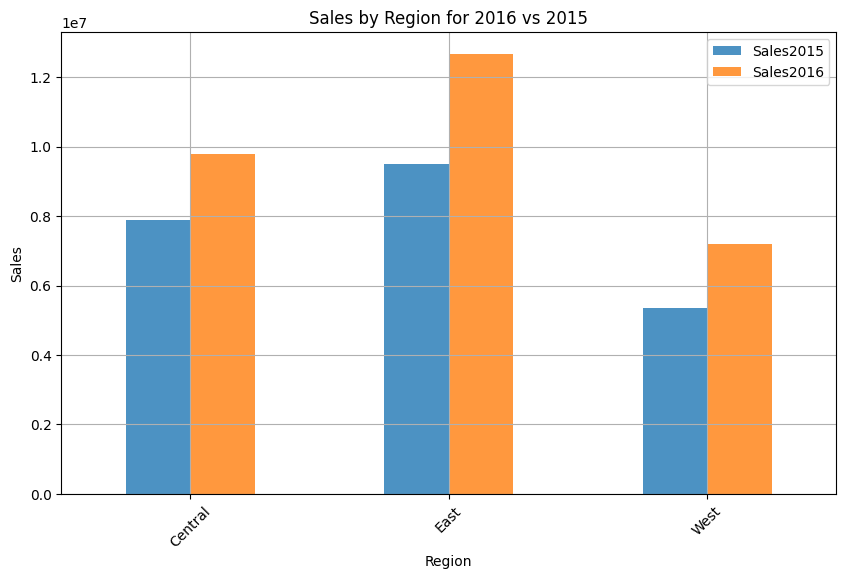

In [18]:
region_sales = sales_data.groupby('Region')[['Sales2015', 'Sales2016']].sum()

region_sales_stacked = region_sales.stack().unstack(level=1)

region_sales_stacked.plot(kind='bar', figsize=(10, 6),alpha=0.8)
plt.title('Sales by Region for 2016 vs 2015')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


#### 2.  Pie Charts for Sales for Each Region in 2016

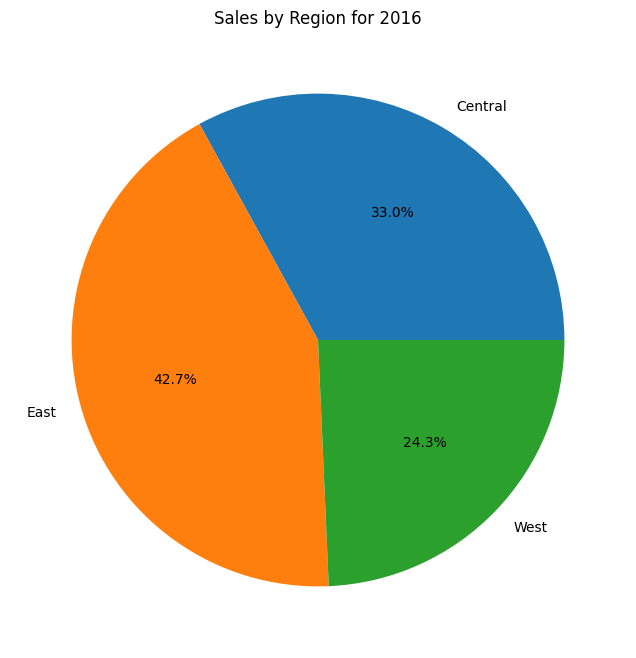

In [22]:
region_sales_2016 = sales_data.groupby('Region')['Sales2016'].sum()

region_sales_2016.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sales by Region for 2016')
plt.ylabel('')
plt.show()

#### 3.Compare Sales of 2015 and 2016 with Region and Tiers

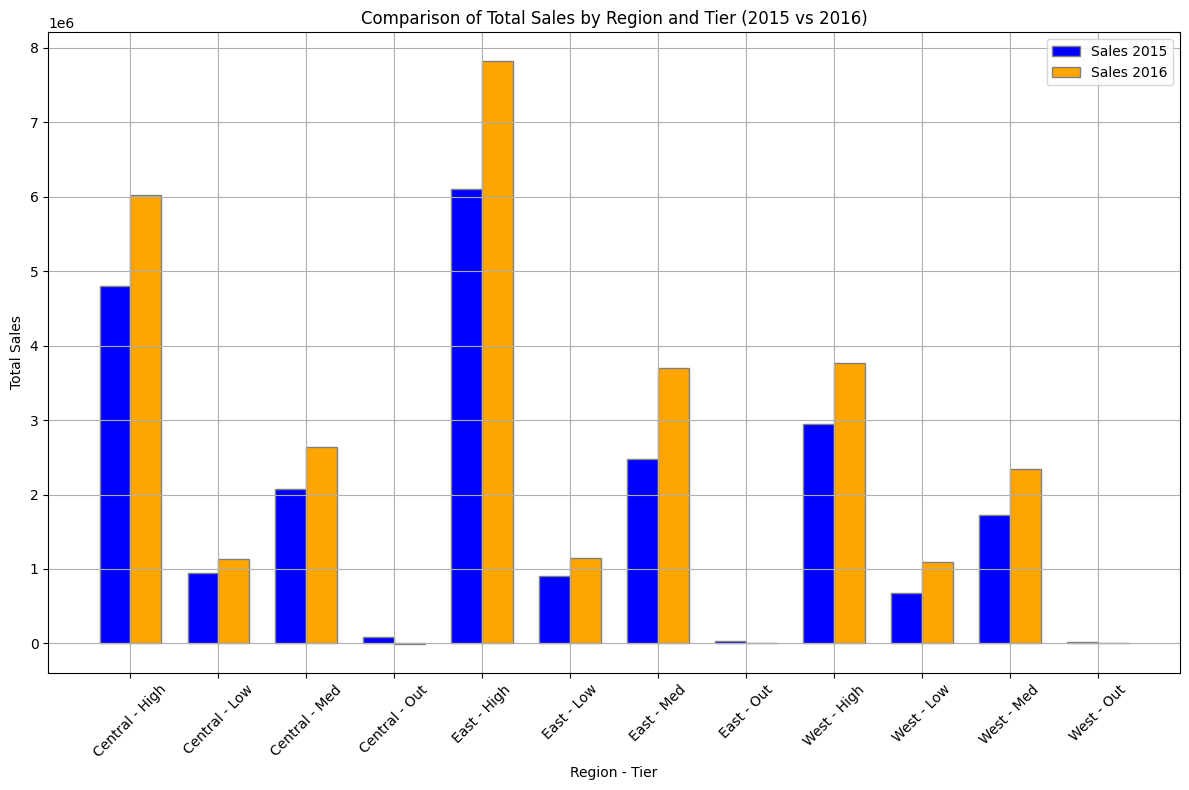

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

sales_by_region_tier = sales_data.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum().reset_index()

plt.figure(figsize=(12, 8))

bar_width = 0.35
r1 = range(len(sales_by_region_tier))
r2 = [x + bar_width for x in r1]

plt.bar(r1, sales_by_region_tier['Sales2015'], color='blue', width=bar_width, edgecolor='grey', label='Sales 2015')
plt.bar(r2, sales_by_region_tier['Sales2016'], color='orange', width=bar_width, edgecolor='grey', label='Sales 2016')

plt.xlabel('Region - Tier')
plt.ylabel('Total Sales')
plt.title('Comparison of Total Sales by Region and Tier (2015 vs 2016)')
plt.xticks([r + bar_width/2 for r in range(len(sales_by_region_tier))], 
           [f"{sales_by_region_tier.loc[i, 'Region']} - {sales_by_region_tier.loc[i, 'Tier']}" 
            for i in range(len(sales_by_region_tier))], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#### 4. In East Region, Which State Registered a Decline in 2016 Compared to 2015

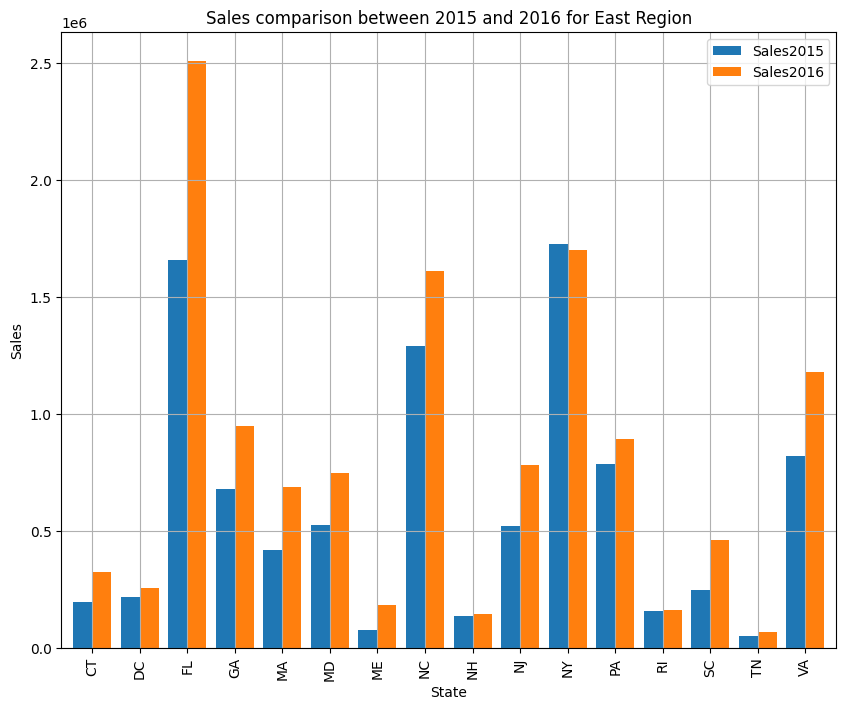

In East Region NY state registered a decline in sales in 2016


In [135]:
sales_state=sales_data.groupby(['Region','State'])[['Sales2015','Sales2016']].sum()
sales_east = sales_state.loc["East"]
sales_east.plot(kind="bar",figsize=(10,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.grid()
plt.show()
print("In East Region NY state registered a decline in sales in 2016")

####  5. In All the High Tier, Which Division Saw a Decline in Number of Units Sold in 2016 Compared to 2015

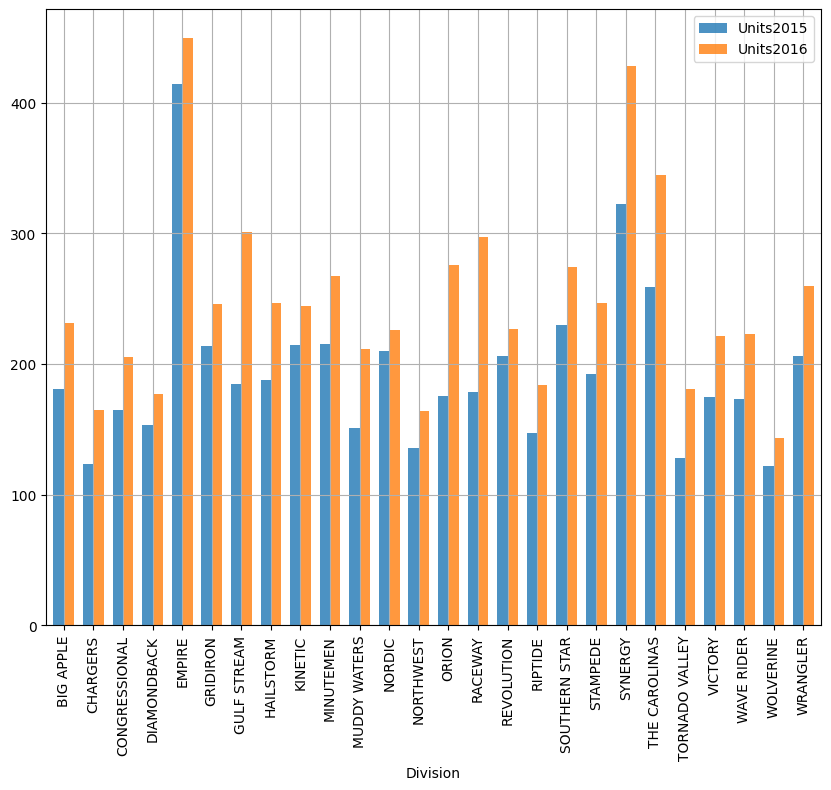

In [134]:
sales_division_tier = sales_data.groupby(['Tier','Division'])[["Units2015","Units2016"]].sum()
high_tier= sales_division_tier.loc["High"]
high_tier.plot(kind="bar",figsize=(10,8),width=0.7,alpha=0.8)
plt.grid()

#### 6. Creating quarter columns

In [110]:
import pandas as pd

def get_quarter(month):
    if month in ['Jan', 'Feb', 'Mar']:
        return 'Q1'
    elif month in ['Apr', 'May', 'Jun']:
        return 'Q2'
    elif month in ['Jul', 'Aug', 'Sep']:
        return 'Q3'
    elif month in ['Oct', 'Nov', 'Dec']:
        return 'Q4'
    else:
        return None 

sales_data['Qtr'] = sales_data['Month'].apply(get_quarter)
print(sales_data.head())


   AccountId AccountName Region     Division       City State Tier Month  \
0       1116    Account1   West  DIAMONDBACK  PHOENIX W    AZ  Low   Aug   
1       1116    Account1   West  DIAMONDBACK  PHOENIX W    AZ  Low   Oct   
2       2391    Account2   East    MINUTEMEN   HARTFORD    CT  Med   Jun   
3       2391    Account2   East    MINUTEMEN   HARTFORD    CT  Med   Mar   
4       2397    Account3   East    MINUTEMEN  WORCESTER    MA  Med   Sep   

   Sales2015  Sales2016  Units2015  Units2016  TargetAchevied2015  \
0       0.00   13208.52        0.0        4.0                0.70   
1   10500.78   23114.91        3.0        7.0                0.84   
2       0.00    6627.00        0.0        3.0                1.15   
3   19881.00   13254.00        9.0        6.0                1.33   
4    3684.48       0.00        1.0        0.0                1.02   

   TargetAchevied2016 Qtr  
0                1.53  Q3  
1                1.31  Q4  
2                1.29  Q2  
3               

#### 7. Compare Qtr Wise Sales in 2015 and 2016 in a Bar Plot

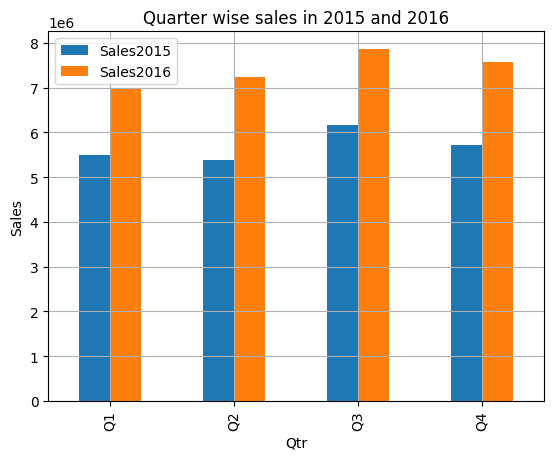

In [130]:
Qtr_sales = sales_data.groupby("Qtr")[["Sales2015","Sales2016"]].sum()
Qtr_sales.plot(kind="bar")
plt.ylabel("Sales")
plt.title("Quarter wise sales in 2015 and 2016")
plt.grid()
plt.show()

#### 8. Determine the Composition of Qtr Wise Sales in 2016 with Regards to All the Tiers in a Pie Chart

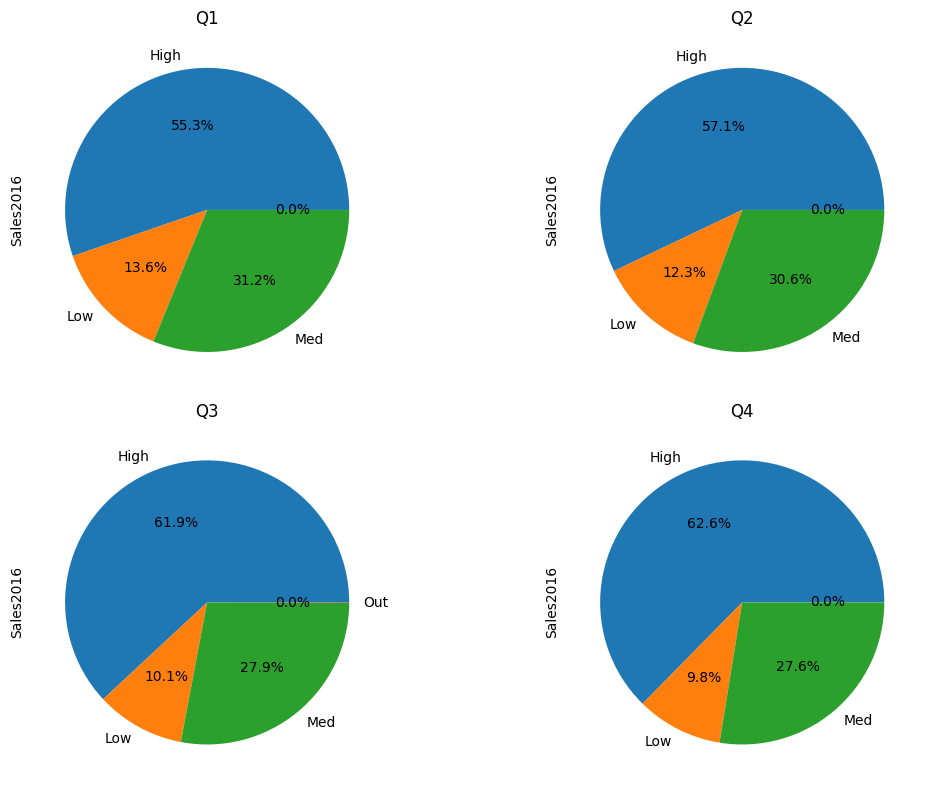

In [132]:
q1=sales_data[sales_data["Qtr"] == 'Q1']
q1s=q1.groupby('Tier')['Sales2016'].sum()
q2=sales_data[sales_data["Qtr"] == 'Q2']
q2s=q2.groupby('Tier')['Sales2016'].sum()
q3=sales_data[sales_data["Qtr"] == 'Q3']
q3s=q3.groupby('Tier')['Sales2016'].sum().abs()
q4=sales_data[sales_data["Qtr"] == 'Q4']
q4s=q4.groupby('Tier')['Sales2016'].sum()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

q1s.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 0])
axs[0, 0].set_title('Q1')

q2s.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 1])
axs[0, 1].set_title('Q2')

q3s.plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 0])
axs[1, 0].set_title('Q3')

q4s.plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 1])
axs[1, 1].set_title('Q4')

plt.tight_layout()
plt.show()